In [4]:
!pip install torch torchvision
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-wekzl7fj
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-wekzl7fj
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 831cdc10906a23aabe4591a4be06f4c989e4ee30
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-zt106awh/groundingdino_9ec7cd554e2c42e086e94ddcff6812ab
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-zt106awh/groundingdino_9ec7cd554e2c42e086e94ddcff6812ab
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 16e0ccdb7da40613591666abe2cb06f91f961503
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [13]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from lang_sam import LangSAM

# Загрузка модели
model = LangSAM()

def download_image(url):
    # Загрузка изображения по указанному URL-адресу
    response = requests.get(url)
    response.raise_for_status()
    return Image.open(BytesIO(response.content)).convert("RGB")

def save_mask(mask_np, filename):
    # Сохранение маски в виде изображения
    mask_image = Image.fromarray((mask_np * 255).astype(np.uint8))
    mask_image.save(filename)

def display_image_with_masks(image, masks):
    # Отображение исходного изображения и маски рядом
    num_masks = len(masks)

    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Исходное изображение")
    axes[0].axis('off')

    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Маска {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def display_image_with_boxes(image, boxes, logits):
    # Отображение изображения с Ббоксами и точностью
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title("Изображение с Ббоксами")
    ax.axis('off')

    for box, logit in zip(boxes, logits):
        x_min, y_min, x_max, y_max = box
        confidence_score = round(logit.item(), 2)  # Преобразование логарифмической вероятности в скаляр перед округлением
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Отрисовывание ббокса
        rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Добавление точности в виде текста
        ax.text(x_min, y_min, f"Точность: {confidence_score}", fontsize=8, color='red', verticalalignment='top')

    plt.show()

def print_bounding_boxes(boxes):
    # Вывод информации о ббоксах
    print("Ббоксы:")
    for i, box in enumerate(boxes):
        print(f"Рамка {i+1}: {box}")

def print_detected_phrases(phrases):
    # Вывод обнаруженных фраз
    print("\nОбнаруженные фразы:")
    for i, phrase in enumerate(phrases):
        print(f"Фраза {i+1}: {phrase}")

def print_logits(logits):
    # Вывод точности
    print("\nТочность:")
    for i, logit in enumerate(logits):
        print(f"Логит {i+1}: {logit}")

def predict(image_url, text_prompt):
    try:
        image_pil = download_image(image_url)
        masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

        if len(masks) == 0:
            print(f"Не обнаружено объектов, соответствующих запросу '{text_prompt}' на изображении.")
        else:
            # Преобразование маски в массивы NumPy
            masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

            # Отображение исходного изображения и масок друг за другом
            display_image_with_masks(image_pil, masks_np)

            # Отображение изобраэения с Ббоксами и точностью предсказания
            display_image_with_boxes(image_pil, boxes, logits)

            # Сохранение масок
            for i, mask_np in enumerate(masks_np):
                mask_path = f"image_mask_{i+1}.png"
                save_mask(mask_np, mask_path)

            # Отобразим Ббоксы, фразы и логиты
            print_bounding_boxes(boxes)
            print_detected_phrases(phrases)
            print_logits(logits)

    except (requests.exceptions.RequestException, IOError) as e:
        print(f"Ошибка: {e}")



final text_encoder_type: bert-base-uncased
Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


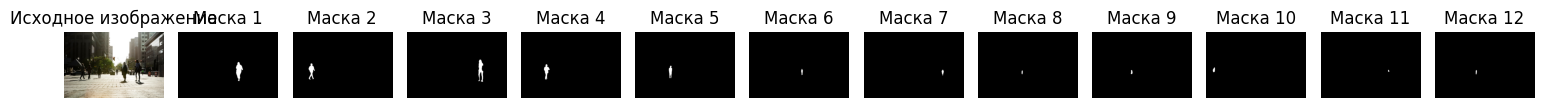

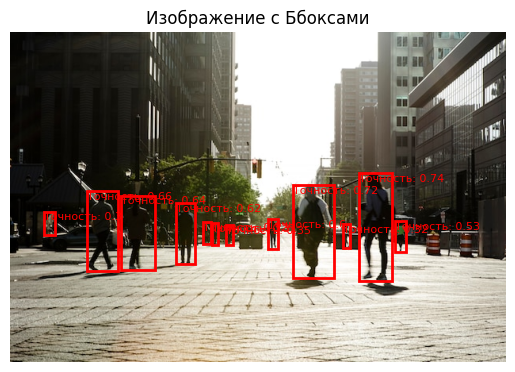

Ббоксы:
Рамка 1: tensor([357.1035, 192.6991, 407.9290, 310.4245])
Рамка 2: tensor([ 96.3081, 201.1662, 135.5363, 301.6188])
Рамка 3: tensor([440.4899, 177.4092, 481.9865, 314.5851])
Рамка 4: tensor([139.5963, 206.3906, 182.9794, 300.6364])
Рамка 5: tensor([209.1916, 215.7366, 232.5036, 292.9980])
Рамка 6: tensor([325.7256, 236.1363, 338.3064, 273.5069])
Рамка 7: tensor([485.4589, 239.1274, 499.4173, 277.0464])
Рамка 8: tensor([272.2658, 244.0271, 280.6023, 268.9964])
Рамка 9: tensor([243.1855, 240.1040, 252.6216, 267.2434])
Рамка 10: tensor([ 42.2912, 226.5904,  56.5642, 256.6920])
Рамка 11: tensor([419.3828, 242.6787, 428.6047, 272.0206])
Рамка 12: tensor([254.2585, 241.0891, 262.3109, 268.9961])

Обнаруженные фразы:
Фраза 1: person
Фраза 2: person
Фраза 3: person
Фраза 4: person
Фраза 5: person
Фраза 6: person
Фраза 7: person
Фраза 8: person
Фраза 9: person
Фраза 10: person
Фраза 11: person
Фраза 12: person

Точность:
Логит 1: 0.7206491231918335
Логит 2: 0.6590109467506409
Логит 3: 0

In [6]:
# В predict записывается image_url и text_prompt, после чего будет выведен результат
predict("https://img.freepik.com/free-photo/census-concept-photographed-in-an-urban-composition_23-2148993168.jpg?size=626&ext=jpg&ga=GA1.1.2116175301.1714089600&semt=ais",
        "person")

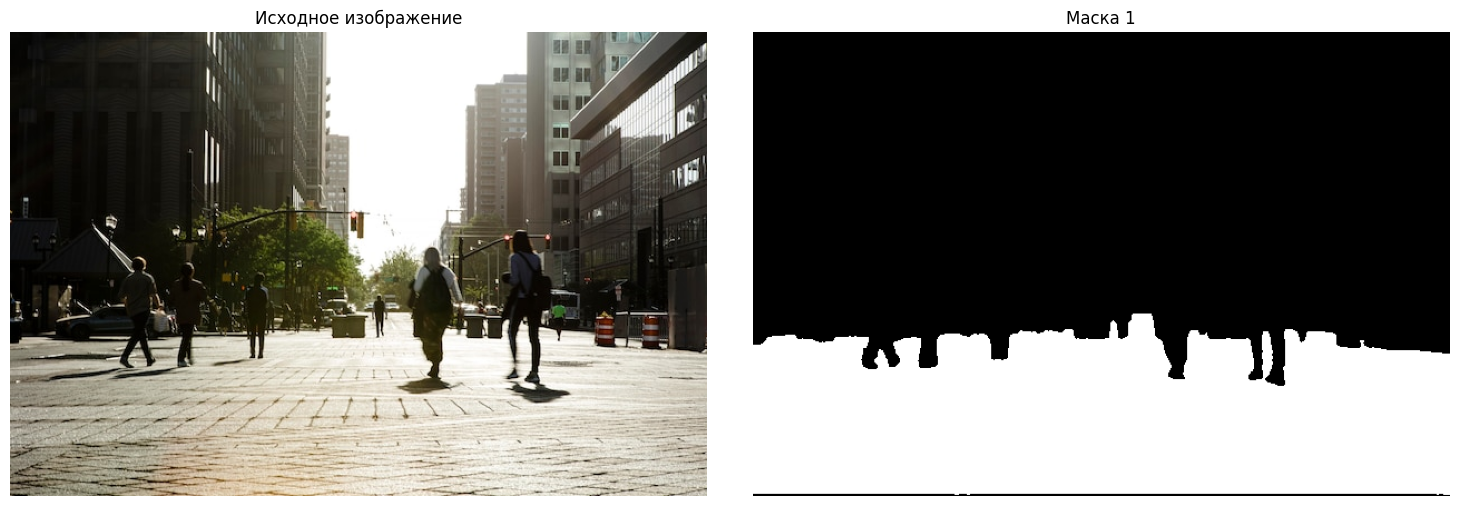

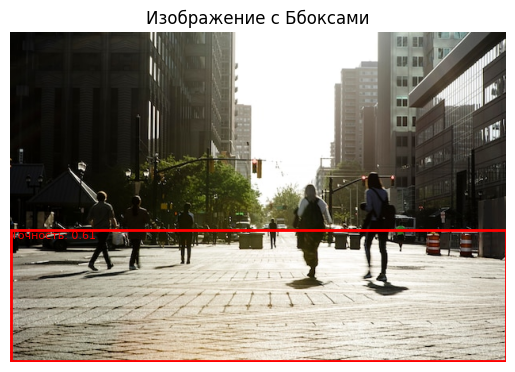

Ббоксы:
Рамка 1: tensor([  0.9485, 249.7679, 624.9509, 414.8227])

Обнаруженные фразы:
Фраза 1: road

Точность:
Логит 1: 0.6082277894020081


In [7]:
# В predict записывается image_url и text_prompt, после чего будет выведен результат
predict("https://img.freepik.com/free-photo/census-concept-photographed-in-an-urban-composition_23-2148993168.jpg?size=626&ext=jpg&ga=GA1.1.2116175301.1714089600&semt=ais",
        "road")

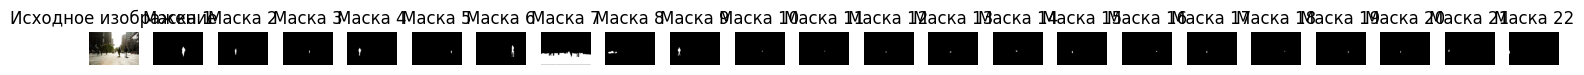

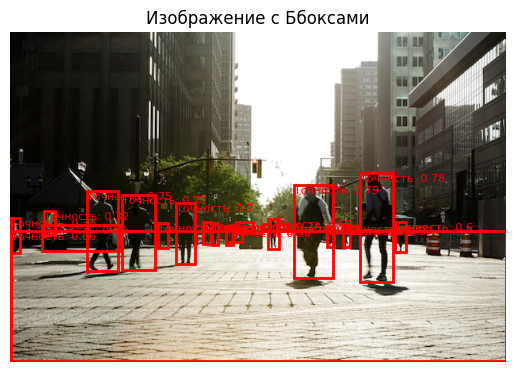

Ббоксы:
Рамка 1: tensor([357.3865, 192.5349, 407.4930, 310.8954])
Рамка 2: tensor([209.2812, 215.6192, 232.8801, 293.2947])
Рамка 3: tensor([325.5818, 235.8916, 338.6464, 273.8055])
Рамка 4: tensor([140.9287, 206.2528, 181.9147, 300.8062])
Рамка 5: tensor([485.6555, 239.3844, 499.7393, 277.2173])
Рамка 6: tensor([440.6923, 177.4115, 483.4751, 314.9095])
Рамка 7: tensor([5.4318e-01, 2.5128e+02, 6.2539e+02, 4.1564e+02])
Рамка 8: tensor([ 39.5812, 243.8535, 138.9662, 276.9139])
Рамка 9: tensor([ 96.1019, 201.0352, 135.7268, 301.9739])
Рамка 10: tensor([336.5733, 242.1774, 350.0353, 250.8612])
Рамка 11: tensor([318.0139, 242.5807, 327.6570, 250.8342])
Рамка 12: tensor([272.3471, 244.2981, 280.9997, 269.4162])
Рамка 13: tensor([271.5424, 247.9595, 292.1681, 264.8150])
Рамка 14: tensor([284.2114, 239.4035, 306.1980, 253.1113])
Рамка 15: tensor([186.4598, 241.2047, 199.4570, 272.7414])
Рамка 16: tensor([426.2027, 244.4141, 439.6614, 253.8150])
Рамка 17: tensor([243.1129, 239.7436, 253.0301, 2

In [11]:
# В predict записывается image_url и text_prompt, после чего будет выведен результат
predict("https://img.freepik.com/free-photo/census-concept-photographed-in-an-urban-composition_23-2148993168.jpg?size=626&ext=jpg&ga=GA1.1.2116175301.1714089600&semt=ais",
        "person . car . road")